In [1]:
import time
import os
times2 = []
for ncores in range(1,9):
    start = time.perf_counter()
    os.system(f'mpirun -n {ncores} DaMaSCUS-Simulator sensei.cfg ; mpirun -n {ncores} DaMaSCUS-Analyzer length_testing')
    end = time.perf_counter()
    t = end - start
    times2.append(t)


--------------------------------------------------------------------------
prterun was unable to find the specified executable file, and therefore did
not launch the job.  This error was first reported for process rank
0; it may have occurred for other processes as well.

NOTE: A common cause for this error is misspelling a prterun command
   line parameter option (remember that prterun interprets the first
   unrecognized command line token as the executable).

Node:       dhcp-131-225-172-13 Executable: DaMaSCUS-Simulator
--------------------------------------------------------------------------
--------------------------------------------------------------------------
prterun was unable to find the specified executable file, and therefore did
not launch the job.  This error was first reported for process rank
0; it may have occurred for other processes as well.

NOTE: A common cause for this error is misspelling a prterun command
   line parameter option (remember that prterun inter

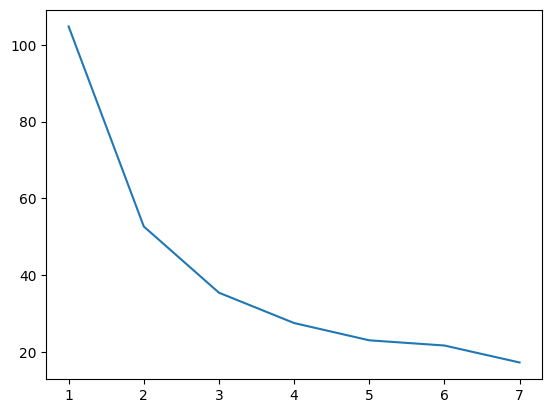

In [4]:
import matplotlib.pyplot as plt
import numpy as np
plt.plot(np.arange(1,8),times)

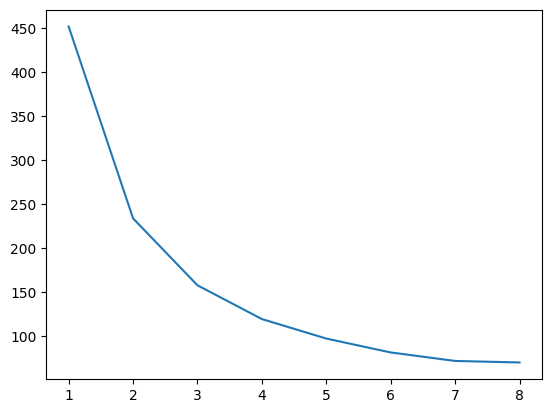

In [2]:
import matplotlib.pyplot as plt
import numpy as np
plt.plot(np.arange(1,9),times2)

In [6]:
times2[-2]/times2[-1]

1.0246579848015789

In [10]:
import os
os.listdir('../sensei_toy_limit/python/theory_tools/QEDark/halo_data/modulated/')

['.DS_Store',
 'Parameter_Scan_Scr',
 'December_mX_0_6_sigma_1e-30_Scr',
 'Verne_LM_Old',
 'Verne_Scr_Old',
 'Parameter_Scan_LM',
 'Parameter_Scan_LM.zip',
 'June_mX_0_6_sigma_1e-30_Scr',
 'Verne_Scr',
 'June_mX_0_6_sigma_1e-30_LM',
 'Verne_LM',
 'Parameter_Scan_Scr.zip',
 'December_mX_0_6_sigma_1e-30_LM',
 'Parameter_Scan_Scr_sigmaPs',
 'Parameter_Scan_LM_sigmaPs']

In [13]:
import os
import numpy as np
import re
from DaMaSCUS_helper import DaMaSCUS_helper
test = DaMaSCUS_helper()
outdir = '../sensei_toy_limit/python/theory_tools/QEDark/halo_data/modulated/'
km = 5.067*1e18
s = 1.51905*1e24
rhoX = 0.3
# write_dir = outdir + dirname + f'/mDM_{mass_str}_MeV_sigmaE_{sigmaE}_cm2/'

files = os.listdir('results/results')
for f in files:
    # if 'histograms' in f:
        # print(f)
    if 'rho' not in f or 'cfg' not in f: 
        continue

    
    
    print(f)
    idname = f[:-4]
    # print(idname)
    mass = re.findall('mX.*_s',f)[0][2:-2]
    mass = float(mass.replace('_','.'))
    # print(mass)
    if 'long' in f:
        print('long file found')
        fdm = int(re.findall('fdm.*_long',idname)[0][3:-5])
        print(fdm)

    else:
        fdm = int(re.findall('fdm.*.cfg',idname)[0][3:-4])
    # print(fdm)
    hist_dir = f'results/results/{idname}_histograms'

    sigmaP = float(re.findall('sigma.*_fdm',f)[0][5:-4])
    sigmaE = test.sigmaP_to_sigmaE(sigmaP,mass)
    sigmaE = float(format(sigmaE, '.3g'))
    # print(sigmaE)
    if fdm == 0:
        dirname = 'Parameter_Scan_Scr'
    elif fdm == 2:
        dirname = 'Parameter_Scan_LM'
    mass_str = str(np.round(float(mass),3)).replace('.','_')
    write_dir = outdir + dirname + f'/mDM_{mass_str}_MeV_sigmaE_{sigmaE}_cm2/'
    if 'long' in f:
        write_dir = outdir + dirname + f'/mDM_{mass_str}_MeV_sigmaE_{sigmaE}_cm2_long/'

    if not os.path.isdir(write_dir):
        os.mkdir(write_dir)


    fname_rhoDam = f'results/results/{idname}.rho'
    fdatarho = np.loadtxt(fname_rhoDam,delimiter='\t')
    rho = fdatarho[:,1]


    if not os.path.isdir(hist_dir):
        print('********************************')
        print('this mass point and sigma does not seem to ahve a histograms folder yet')
        print()
        print()
        print(mass,sigmaP,fdm)
    
        continue
    num_angles = int(len(os.listdir(hist_dir))/2)
    for isoangle in range(0,num_angles):
        fname_DAMASCUS = f'{hist_dir}/eta.{isoangle}'
        try:
            fdata = np.loadtxt(fname_DAMASCUS,delimiter='\t')
        except ValueError:
            print(fname_DAMASCUS)
            raise(ValueError('This file didnt work for some reason'))
        vmin = fdata[:,0] * s/km
        eta = fdata[:,1]*km/s
        eta_err = fdata[:,3]*km/s
        eta*=(rho[isoangle]/rhoX)
        # print(rho[isoangle]/self.rhoX,self.rhoX,rho[isoangle])
        eta_err*=(rho[isoangle]/rhoX)
        import csv
        with open(write_dir+f'DM_Eta_theta_{isoangle}.txt','w') as f:
            writer = csv.writer(f,delimiter='\t')
            writer.writerows(zip(vmin,eta,eta_err))


    # print('num_angles',num_angles)
    




mX1_4_sigma1.39e-38_fdm2.cfg.rho
mX1_7_sigma1.46e-36_fdm0.cfg.rho
mX0_6_sigma5.33e-34_fdm2.cfg.rho
mX3_75_sigma2.18e-36_fdm0.cfg.rho
mX3_2_sigma7.54e-35_fdm2.cfg.rho
mX7_0_sigma2.13e-37_fdm0.cfg.rho
mX3_6_sigma6.42e-38_fdm0.cfg.rho
mX0_5_sigma3.07e-37_fdm2.cfg.rho
mX2_81_sigma4.2e-31_fdm2.cfg.rho
mX6_0_sigma1.26e-35_fdm0.cfg.rho
mX2_0_sigma1.03e-37_fdm2.cfg.rho
mX1_34_sigma1.31e-30_fdm2.cfg.rho
mX1_6_sigma2.45e-35_fdm2.cfg.rho
mX7_0_sigma7.15e-35_fdm2.cfg.rho
mX10.0_sigma5.96e-34_fdm0.cfg.rho
mX1_0_sigma9.86e-34_fdm2.cfg.rho
mX4_19_sigma8.39e-34_fdm2.cfg.rho
mX0_1_sigma2.62e-38_fdm2.cfg.rho
mX1_06_sigma9.43e-33_fdm0.cfg.rho
mX5_0_sigma1.15e-37_fdm2.cfg.rho
mX4_6_sigma7.78e-36_fdm0.cfg.rho
mX7_89_sigma2.66e-32_fdm0.cfg.rho
mX1_1_sigma9.92e-39_fdm2.cfg.rho
mX2_11_sigma8.28e-36_fdm0.cfg.rho
mX6_27_sigma5.49e-37_fdm0.cfg.rho
mX2_4_sigma1.08e-35_fdm0.cfg.rho
mX10.0_sigma2.55e-33_fdm0.cfg.rho
mX0_9_sigma2.01e-34_fdm0.cfg.rho
mX5_0_sigma1.15e-30_fdm2.cfg.rho
mX0_6_sigma2.28e-33_fdm2.cfg.rho
m

In [22]:
f = 'results/results/mX4_2_sigma8.42e-38_fdm0.cfg_histograms/eta.1'
np.loadtxt(f,delimiter='\t')

array([[0.00000e+00, 1.13177e+03, 7.34646e-06, 3.76770e+00],
       [1.46929e-05, 1.13177e+03, 7.34646e-06, 3.76770e+00],
       [2.93858e-05, 1.13129e+03, 7.34646e-06, 3.75133e+00],
       [4.40787e-05, 1.13051e+03, 7.34646e-06, 3.73278e+00],
       [5.87716e-05, 1.12907e+03, 7.34646e-06, 3.70239e+00],
       [7.34646e-05, 1.12737e+03, 7.34646e-06, 3.67809e+00],
       [8.81575e-05, 1.12529e+03, 7.34646e-06, 3.65274e+00],
       [1.02850e-04, 1.12269e+03, 7.34646e-06, 3.62240e+00],
       [1.17543e-04, 1.11953e+03, 7.34646e-06, 3.58914e+00],
       [1.32236e-04, 1.11603e+03, 7.34646e-06, 3.55822e+00],
       [1.46929e-04, 1.11208e+03, 7.34646e-06, 3.51940e+00],
       [1.61622e-04, 1.10723e+03, 7.34646e-06, 3.42335e+00],
       [1.76315e-04, 1.10218e+03, 7.34646e-06, 3.38583e+00],
       [1.91008e-04, 1.09710e+03, 7.34646e-06, 3.35214e+00],
       [2.05701e-04, 1.09165e+03, 7.34646e-06, 3.31771e+00],
       [2.20394e-04, 1.08546e+03, 7.34646e-06, 3.27624e+00],
       [2.35087e-04, 1.0

In [18]:
data = []
with open(f,'r') as e:
    unsplit = e.readlines()
    for line in unsplit:
        data.append(line.split('\t'))



In [17]:
data[-1]

['614777\n']

In [21]:
len(unsplit)

176

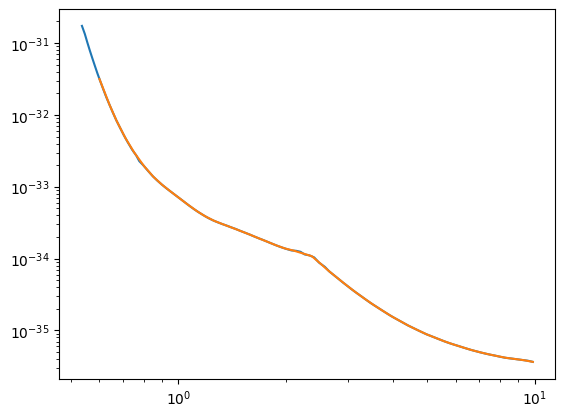

In [34]:
import numpy as np
from scipy.interpolate import Akima1DInterpolator
import matplotlib.pyplot as plt
import math
def orderOfMagnitude(number):
    return math.floor(math.log(number, 10))

light_limits = '../sensei_toy_limit/limits/other_experiments/damicM_modulation_light.csv'
heavy_limits  = '../sensei_toy_limit/limits/other_experiments/damicM_modulation_heavy.csv'


lightdata = np.loadtxt(light_limits,delimiter=',')
heavydata = np.genfromtxt(heavy_limits,delimiter=',')

lightmX = lightdata[:,0]
lightsE = lightdata[:,1]
lightLimit = Akima1DInterpolator(lightmX,lightsE)
dm_masses = np.round(np.geomspace(0.6,lightmX[-1],50),2)
# print(dm_masses)
# print(lightLimit(dm_masses))
gridbase = lightLimit(dm_masses)
oofMags = []
for g in gridbase:
    oofMags.append(orderOfMagnitude(g))

oofMags.append(-36)
oofMags = np.array(oofMags)
dm_masses = np.append(dm_masses,10)
# print(oofMags)
plt.plot(lightmX,lightsE)
plt.plot(dm_masses,lightLimit(dm_masses))
plt.yscale('log')
plt.xscale('log')
grid = []
for i,mX in enumerate(dm_masses):
    oOfMag = oofMags[i]
    sigmaE_grid = np.logspace(oOfMag-3,oOfMag + 3,5)
    for j,s in enumerate(sigmaE_grid):
        grid.append([mX,s])
grid = np.array(grid)
import csv
with open('light_grid.csv','w') as f:
    writer = csv.writer(f,delimiter='\t')
    writer.writerows(zip(grid[:,0],grid[:,1]))


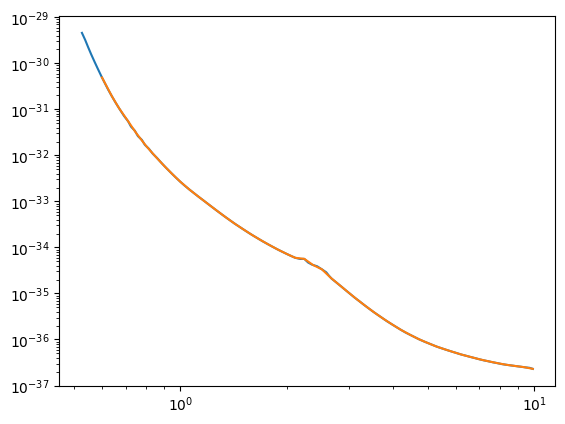

In [36]:
import numpy as np
from scipy.interpolate import Akima1DInterpolator
import matplotlib.pyplot as plt
import math
def orderOfMagnitude(number):
    return math.floor(math.log(number, 10))

light_limits = '../sensei_toy_limit/limits/other_experiments/damicM_modulation_light.csv'
heavy_limits  = '../sensei_toy_limit/limits/other_experiments/damicM_modulation_heavy.csv'


lightdata = np.loadtxt(light_limits,delimiter=',')
heavydata = np.genfromtxt(heavy_limits,delimiter=',')

heavymX = heavydata[:,0]
heavysE = heavydata[:,1]
heavyLimit = Akima1DInterpolator(heavymX,heavysE)
dm_masses = np.round(np.geomspace(0.6,heavymX[-1],50),2)
# print(dm_masses)
# print(lightLimit(dm_masses))
gridbase = heavyLimit(dm_masses)
oofMags = []
for g in gridbase:
    oofMags.append(orderOfMagnitude(g))

oofMags.append(-36)
dm_masses = np.append(dm_masses,10)
oofMags = np.array(oofMags)
# print(oofMags)
plt.plot(heavymX,heavysE)
plt.plot(dm_masses,heavyLimit(dm_masses))
plt.yscale('log')
plt.xscale('log')
grid = []
for i,mX in enumerate(dm_masses):
    oOfMag = oofMags[i]
    sigmaE_grid = np.logspace(oOfMag-3,oOfMag + 3,5)
    for j,s in enumerate(sigmaE_grid):
        grid.append([mX,s])
grid = np.array(grid)
import csv
with open('heavy_grid.csv','w') as f:
    writer = csv.writer(f,delimiter='\t')
    writer.writerows(zip(grid[:,0],grid[:,1]))


In [1]:
def fix_eta(self,mass,sigmaE,fdm,idname,outdir):
        import numpy as np
        import os
        # os.system('rm -r ./data/*')
        fname_rhoDam = f'./results/results/{idname}.rho'
        fdata = np.loadtxt(fname_rhoDam,delimiter='\t')
        rho = fdata[:,1]
        mass_str = str(np.round(mass,3)).replace('.','_')
        if fdm == 0:
            dirname = 'Parameter_Scan_Scr'
        elif fdm == 2:
            dirname = 'Parameter_Scan_LM'

        write_dir = outdir + dirname + f'/mDM_{mass_str}_MeV_sigmaE_{sigmaE}_cm2/'
        if not os.path.isdir(write_dir):
            os.mkdir(write_dir)
        for isoangle in range(0,self.isorings):
            fname_DAMASCUS = f'./results/results/{idname}_histograms/eta.{isoangle}'
            
            fdata = np.loadtxt(fname_DAMASCUS,delimiter='\t')
            vmin = fdata[:,0] * self.s/self.km
            eta = fdata[:,1]*self.km/self.s
            eta_err = fdata[:,3]*self.km/self.s
            eta*=(rho[isoangle]/self.rhoX)
            # print(rho[isoangle]/self.rhoX,self.rhoX,rho[isoangle])
            eta_err*=(rho[isoangle]/self.rhoX)
            import csv
            with open(write_dir+f'DM_Eta_theta_{isoangle}.txt','w') as f:
                writer = csv.writer(f,delimiter='\t')
                writer.writerows(zip(vmin,eta,eta_err))
        # os.system(f"rm -r ./results/{idname}*")

In [2]:
import os
from DaMaSCUS_helper import DaMaSCUS_helper
damascus = DaMaSCUS_helper()
import re
outdir = '../sensei_toy_limit/python/theory_tools/QEDark/halo_data/modulated/'
files = os.listdir('results')
for f in files:
    if 'histograms' not in f:
        continue
    if 'mX' not in f:
        continue
    mass = re.findall('mX.*si',f)[0][2:-3]
    mass = float(mass.replace('_','.'))
    sigmaP = float(re.findall('ma.*fdm',f)[0][2:-4])
    sigmaE = damascus.sigmaP_to_sigmaE(sigmaP,mass)

    sigmaE =float(format(sigmaE, '.2g'))

    fdm = re.findall('fdm.*.cfg',f)[0][3:-4]
    if fdm == 'none':
        continue
    else:
        fdm = int(fdm)
    idname = f[:-11]
    damascus.fix_eta(mass,sigmaE,fdm,idname,outdir,delete=False)
    # damascus.fix_eta(mass,sigmaE,fdm)
# fix_eta(mass,sigmaE,fdm,idname,outdir)



In [3]:
os.path.isdir(outdir +'Parameter_Scan_Scr')

False

In [4]:
import numpy as np
from tqdm.autonotebook import tqdm
from DaMaSCUS_helper import *
# sigmaEs = np.arange(-40,-28,1)
# sigmaEs = np.arange(-40,-26,(-26 + 40)/1000)
# sigmaEs = 10**(sigmaEs)
# # mX_array = np.concatenate((np.arange(0.2,0.8,0.025),np.array([0.9]),np.arange(1,5,0.05),np.arange(5,11,1),np.array([20,50,100,200,500,1000])))
# mX_array_heavy = np.concatenate((np.arange(0.2,10,0.025),np.arange(10,1500,0.1)))

mX_array_heavy = np.geomspace(0.1,1000,20)
sigmaEs_heavy = np.geomspace(1e-42,1e-28,20)

#np.arange(0.1,1500,0.1)
EDLNU = Earth_Density_Layer_NU()
r_test = 0.8*EDLNU.EarthRadius
vMax = 300 * EDLNU.km / EDLNU.sec

MFP_heavy = []
FDMn = 1
for s in tqdm(range(len(sigmaEs_heavy))):
    MFP_small = []
    for m in range(len(mX_array_heavy)):
        mX = mX_array_heavy[m]*1e-3 #GeV
        sigmaP= sigmaEs_heavy[s] * (EDLNU.muXElem(mX,EDLNU.mProton) / EDLNU.muXElem(mX,EDLNU.mElectron))**2
        mfp = EDLNU.Mean_Free_Path(r_test,mX,sigmaP,vMax,FDMn,doScreen=True)
        MFP_small.append(mfp)
    MFP_small = np.array(MFP_small)
    MFP_heavy.append(MFP_small)
MFP_heavy = np.array(MFP_heavy)


MFP_light = []
FDMn = 2
for s in tqdm(range(len(sigmaEs_heavy))):
    MFP_small = []
    for m in range(len(mX_array_heavy)):
        mX = mX_array_heavy[m]*1e-3 #GeV
        sigmaP= sigmaEs_heavy[s] * (EDLNU.muXElem(mX,EDLNU.mProton) / EDLNU.muXElem(mX,EDLNU.mElectron))**2
        mfp = EDLNU.Mean_Free_Path(r_test,mX,sigmaP,vMax,FDMn,doScreen=True)
        MFP_small.append(mfp)
    MFP_small = np.array(MFP_small)
    MFP_light.append(MFP_small)
MFP_light = np.array(MFP_light)





  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

[1.e-16 1.e-15 1.e-14 1.e-13 1.e-12 1.e-11 1.e-10 1.e-09 1.e-08 1.e-07
 1.e-06 1.e-05 1.e-04 1.e-03 1.e-02 1.e-01 1.e+00 1.e+01 1.e+02 1.e+03
 1.e+04 1.e+05 1.e+06 1.e+07 1.e+08 1.e+09 1.e+10 1.e+11 1.e+12 1.e+13
 1.e+14 1.e+15]


AttributeError: 'NoneType' object has no attribute 'get_view_interval'

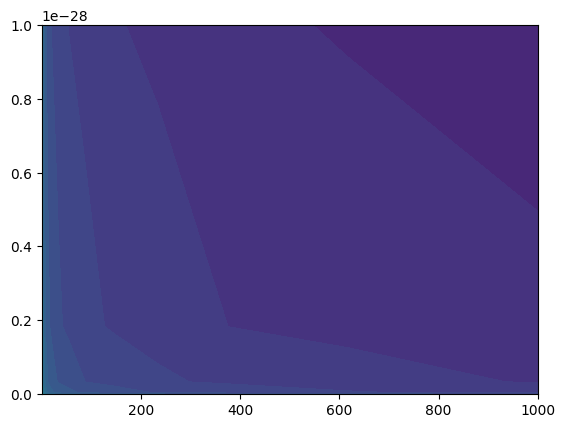

In [18]:
import matplotlib.pyplot as plt
from matplotlib import colors
from matplotlib import ticker
levs = np.arange(-16,16,1)
levs = np.power(10.,levs)

cs = plt.contourf(mX_array_heavy,sigmaEs_heavy,MFP_heavy,levs,norm=colors.LogNorm())
clevs =  cs.levels
print(clevs)

plt.clabel(cs,levels=clevs,colors='black',fmt = ticker.LogFormatterMathtext())
plt.yscale('log')
plt.xscale('log')

In [1]:
27*5

135